# Introdução a Redes Neurais
## Atividade 03
#### Desenvolver modelos para um sistema de compressão de unidade estacionárias de produção de petróleo
##### Parte 03

Import das bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

### Modelo RNN

Conjunto de dados de pressão de sucção contida no arquivo pressao_succao_c2.csv:

In [2]:
dataset = pd.read_csv('pressao_succao_c2.csv', header=0, index_col=0)
dataset.head(3)

,Press
N,
2000-01-01,0.014555
2000-01-02,0.245910
2000-01-03,0.555520


C:\Users\camil\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


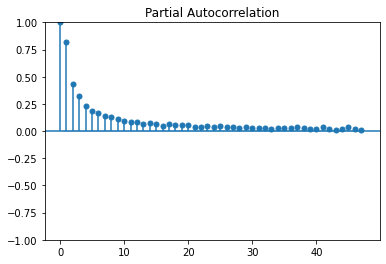

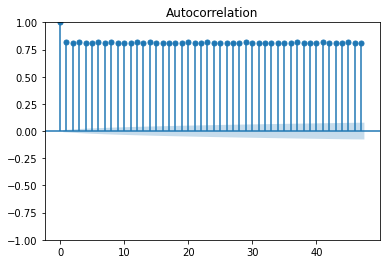

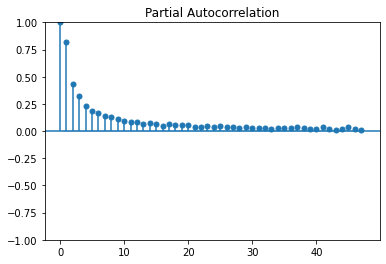

In [3]:
# Análise dos dados
plot_acf(dataset)  # ACF
plot_pacf(dataset) # PACF

Separar dados de treinamento e teste

In [4]:
X = dataset.values
ts_train_len = int(len(dataset)*0.66)
ts_test_len = int(len(dataset)) - ts_train_len
ts_train, ts_test = X[:ts_train_len], X[ts_train_len:]
np.shape(ts_test)

(13601, 1)

Normalização dos dados de treinamento

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
ts_train_scaled = sc.fit_transform(ts_train)
ts_train_scaled

array([[0.00000000e+00],
       [4.25324133e-06],
       [9.94512629e-06],
       ...,
       [1.53305492e-05],
       [1.54051884e-05],
       [1.53502201e-05]])

Criação do conjunto de treinamento de s amostras e t passos de tempo

In [6]:
X_train = []
y_train = []
y_train_stacked = []
time_steps = 5
for_periods = 2
for i in range(time_steps, ts_train_len-1): 
        X_train.append(ts_train_scaled[i-time_steps:i,0])
        y_train.append(ts_train_scaled[i:i+for_periods,0])
X_train, y_train = np.array(X_train), np.array(y_train)
np.shape(y_train)

(26394, 2)

In [74]:
# Reshaping X_train para uma modelagem eficiente
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

Criação do X_test

In [8]:
inputs = dataset.values
inputs = inputs[len(inputs)-len(ts_test)-time_steps:]
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

X_test = []
for i in range(time_steps, ts_test_len+time_steps-for_periods):
        X_test.append(inputs[i-time_steps:i,0])
        
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
np.shape(X_test)

(13599, 5, 1)

Conversão da forma 3-D de X_train e y_train em um DataFrame

In [9]:
X_train_see = pd.DataFrame(np.reshape(X_train, (X_train.shape[0],X_train.shape[1])))
y_train_see = pd.DataFrame(y_train)
pd.concat([X_train_see,y_train_see],axis=1)

,0,1,2,3,4,0,1
0,0.000000e+00,4.253241e-06,9.945126e-06,1.957901e-08,5.024084e-06,8.786931e-06,1.606398e-07
1,4.253241e-06,9.945126e-06,1.957901e-08,5.024084e-06,8.786931e-06,1.606398e-07,6.228056e-06
2,9.945126e-06,1.957901e-08,5.024084e-06,8.786931e-06,1.606398e-07,6.228056e-06,7.635538e-06
3,1.957901e-08,5.024084e-06,8.786931e-06,1.606398e-07,6.228056e-06,7.635538e-06,4.678556e-07
4,5.024084e-06,8.786931e-06,1.606398e-07,6.228056e-06,7.635538e-06,4.678556e-07,7.124830e-06
...,...,...,...,...,...,...,...
26389,1.538460e-05,1.537283e-05,1.530297e-05,1.539453e-05,1.536272e-05,1.531603e-05,1.540133e-05
26390,1.537283e-05,1.530297e-05,1.539453e-05,1.536272e-05,1.531603e-05,1.540133e-05,1.535500e-05
26391,1.530297e-05,1.539453e-05,1.536272e-05,1.531603e-05,1.540133e-05,1.535500e-05,1.533055e-05
26392,1.539453e-05,1.536272e-05,1.531603e-05,1.540133e-05,1.535500e-05,1.533055e-05,1.540519e-05


Conversão da forma 3-D de X_test em um DataFrame

In [10]:
X_test_see = pd.DataFrame(np.reshape(X_test, (X_test.shape[0],X_test.shape[1])))
pd.DataFrame(X_test_see)

,0,1,2,3,4
0,0.000015,0.000015,0.000015,0.000015,0.000015
1,0.000015,0.000015,0.000015,0.000015,0.000014
2,0.000015,0.000015,0.000015,0.000014,0.000015
3,0.000015,0.000015,0.000014,0.000015,0.000015
4,0.000015,0.000014,0.000015,0.000015,0.000014
...,...,...,...,...,...
13594,0.279327,0.280062,0.279676,0.279603,0.280228
13595,0.280062,0.279676,0.279603,0.280228,0.279787
13596,0.279676,0.279603,0.280228,0.279787,0.279860
13597,0.279603,0.280228,0.279787,0.279860,0.280375


In [11]:
print("There are " + str(X_train.shape[0]) + " samples in the training data")
print("There are " + str(X_test.shape[0]) + " samples in the test data")

There are 26394 samples in the training data
There are 13599 samples in the test data


Criação do modelo RNN

In [12]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [13]:
my_rnn_model = Sequential()
my_rnn_model.add(SimpleRNN(30, return_sequences=True))
my_rnn_model.add(SimpleRNN(30))
my_rnn_model.add(Dense(2))
my_rnn_model.compile(optimizer='rmsprop', loss='mean_squared_error')

In [14]:
# Ajustando o Modelo RNN
my_rnn_model.fit(X_train, y_train, epochs=10, batch_size=500, verbose=0)

In [15]:
# Criando as predições
rnn_predictions = my_rnn_model.predict(X_test)
rnn_predictions

array([[0.02297737, 0.03009186],
       [0.02297725, 0.03009173],
       [0.02297713, 0.03009142],
       ...,
       [0.25560126, 0.25111914],
       [0.25563315, 0.2512522 ],
       [0.25575048, 0.2513717 ]], dtype=float32)

In [16]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
ts_test_scaled = sc.fit_transform(ts_test)

actual_pred = pd.DataFrame(columns = ['Expected', 'Prediction'])
actual_pred['Expected'] = ts_test_scaled[0:len(rnn_predictions),0]
actual_pred['Prediction'] = rnn_predictions[:,0]
actual_pred

,Expected,Prediction
0,0.000000e+00,0.022977
1,3.021654e-06,0.022977
2,3.109631e-06,0.022977
3,2.135226e-07,0.022977
4,3.326007e-06,0.022977
...,...,...
13594,7.237046e-01,0.255423
13595,7.238948e-01,0.255544
13596,7.252264e-01,0.255601
13597,7.240375e-01,0.255633


Avaliação das predições

In [17]:
from keras.metrics import MeanSquaredError
m = MeanSquaredError()
m.update_state(np.array(actual_pred['Expected']),np.array(actual_pred['Prediction']))
print('Teste RMSE modelo RNN: %.3f' % m.result().numpy())

Teste RMSE modelo RNN: 0.200


Gráfico dos resultados

Text(0.5, 1.0, 'MODELO RNN')

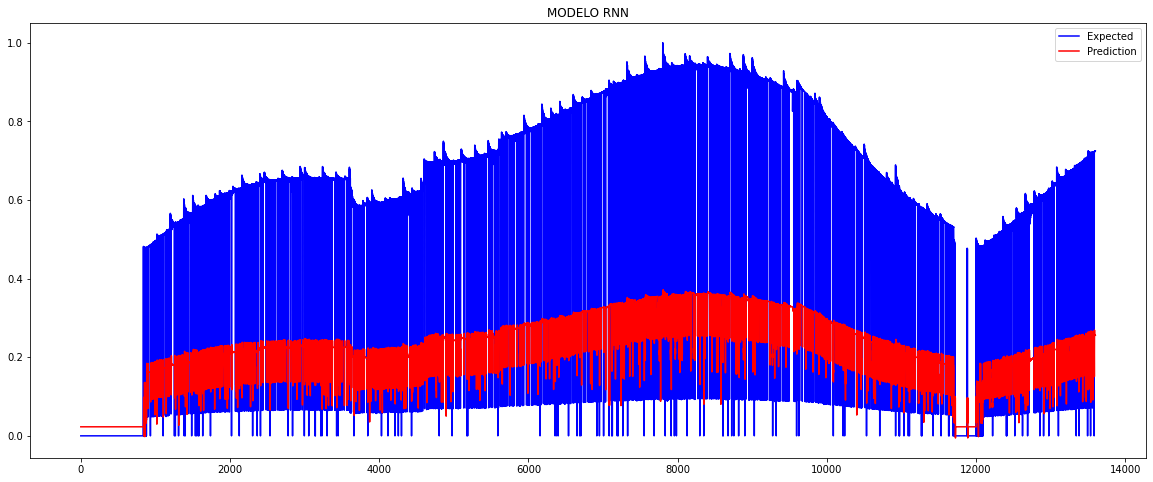

In [18]:
actual_pred['Expected'].plot(figsize=(20,8), legend=True, color='blue')
actual_pred['Prediction'].plot(figsize=(20,8), legend=True, color='red')
plt.title('MODELO RNN')

### Modelo LSTM

In [19]:
from keras.layers import LSTM, Dropout
from tensorflow.keras.optimizers import SGD

Criação do modelo

In [20]:
# Arquitetura
my_LSTM_model = Sequential()
my_LSTM_model.add(LSTM(units=40, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
my_LSTM_model.add(LSTM(units=40, activation='tanh'))
my_LSTM_model.add(Dropout(0.2))
my_LSTM_model.add(Dense(units=2))

In [21]:
my_LSTM_model.compile(optimizer=SGD(learning_rate=0.01, decay=1e-7, momentum=0.9, nesterov=False), 
 loss='mean_squared_error')

In [22]:
# Ajustando o conjunto de dados para treinamento
my_LSTM_model.fit(X_train, y_train, epochs=500, batch_size=1000, verbose=0)

In [23]:
# Criando as predições
LSTM_prediction = my_LSTM_model.predict(X_test)

In [24]:
actual_pred_lstm = pd.DataFrame(columns = ['Expected', 'Prediction'])
actual_pred_lstm['Expected'] = ts_test_scaled[0:len(LSTM_prediction),0]
actual_pred_lstm['Prediction'] = LSTM_prediction[:,0]
actual_pred_lstm

,Expected,Prediction
0,0.000000e+00,0.007143
1,3.021654e-06,0.007143
2,3.109631e-06,0.007143
3,2.135226e-07,0.007143
4,3.326007e-06,0.007143
...,...,...
13594,7.237046e-01,0.315371
13595,7.238948e-01,0.315628
13596,7.252264e-01,0.315531
13597,7.240375e-01,0.315711


Avaliação das predições

In [25]:
m_lstm = MeanSquaredError()
m_lstm.update_state(np.array(actual_pred_lstm['Expected']),np.array(actual_pred_lstm['Prediction']))
print('Teste RMSE modelo LSTM: %.3f' % m_lstm.result().numpy())

Teste RMSE modelo LSTM: 0.168


Gráfico dos resultados

Text(0.5, 1.0, 'MODELO LSTM')

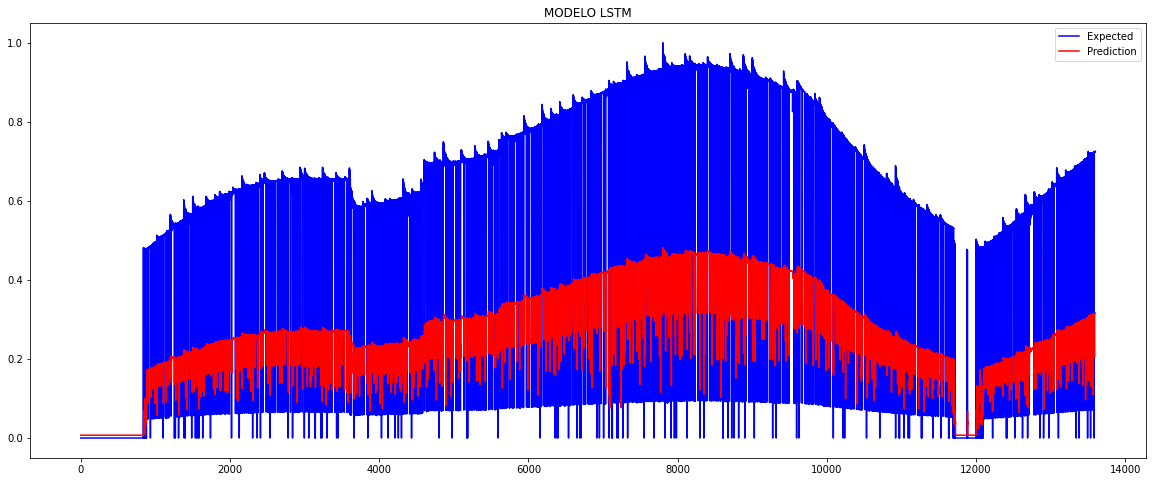

In [26]:
actual_pred_lstm['Expected'].plot(figsize=(20,8), legend=True, color='blue')
actual_pred_lstm['Prediction'].plot(figsize=(20,8), legend=True, color='red')
plt.title('MODELO LSTM')

### Modelo GRU

In [27]:
from keras.layers import GRU

Criação do modelo

In [67]:
# Arquitetura
my_GRU_model = Sequential()
my_GRU_model.add(GRU(units=30, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
my_GRU_model.add(GRU(units=30, activation='tanh'))
my_GRU_model.add(Dense(units=2))

In [68]:
my_GRU_model.compile(optimizer=SGD(learning_rate=0.01, decay=1e-7, momentum=0.9, nesterov=False),
 loss='mean_squared_error')

In [69]:
# Ajustando o conjunto de dados para treinamento
my_GRU_model.fit(X_train, y_train, epochs=50, batch_size=500, verbose=0)

In [70]:
# Criando as predições
GRU_prediction = my_GRU_model.predict(X_test)

In [71]:
actual_pred_gru = pd.DataFrame(columns = ['Expected', 'Prediction'])
actual_pred_gru['Expected'] = ts_test_scaled[0:len(GRU_prediction),0]
actual_pred_gru['Prediction'] = GRU_prediction[:,0]
actual_pred_gru

,Expected,Prediction
0,0.000000e+00,-0.011575
1,3.021654e-06,-0.011575
2,3.109631e-06,-0.011575
3,2.135226e-07,-0.011575
4,3.326007e-06,-0.011575
...,...,...
13594,7.237046e-01,0.355211
13595,7.238948e-01,0.355321
13596,7.252264e-01,0.355294
13597,7.240375e-01,0.355436


Avaliação das predições

In [72]:
m_gru = MeanSquaredError()
m_gru.update_state(np.array(actual_pred_gru['Expected']),np.array(actual_pred_gru['Prediction']))
print('Teste RMSE modelo GRU: %.3f' % m_gru.result().numpy())

Teste RMSE modelo GRU: 0.143


Gráfico dos resultados

Text(0.5, 1.0, 'MODELO GRU')

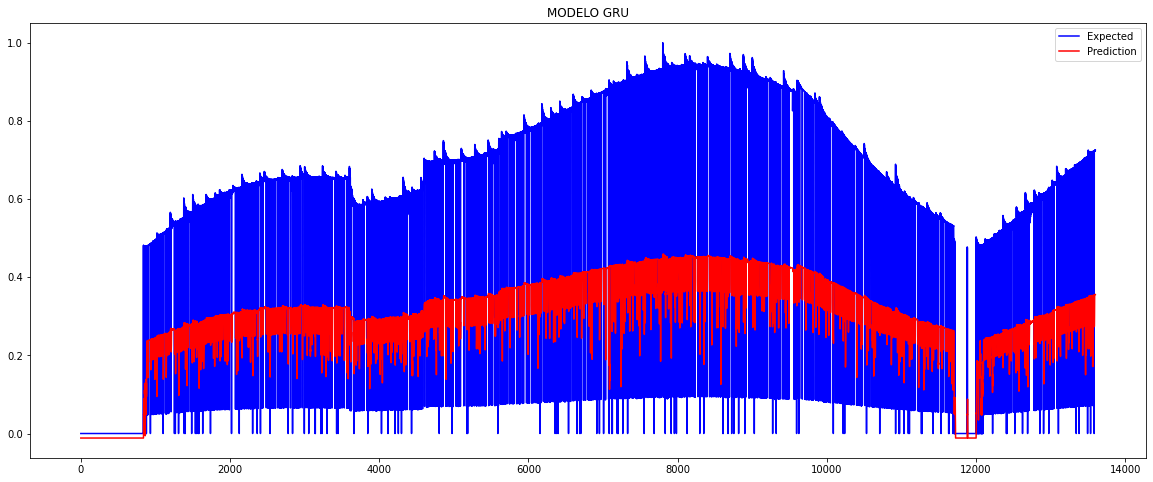

In [73]:
actual_pred_gru['Expected'].plot(figsize=(20,8), legend=True, color='blue')
actual_pred_gru['Prediction'].plot(figsize=(20,8), legend=True, color='red')
plt.title('MODELO GRU')